Intializing the functions + parameters + data for the training and test.

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

def train_model(model, train_loader, criterion, optimizer, num_epochs, path, print_progress=True):
    model.train()
    loss_history = []
    accuracy_history = []

    for epoch in range(num_epochs):
        total_loss = 0.0
        correct = 0
        total = 0

        for data, labels in tqdm(train_loader, desc=f'Epoch {epoch}/{num_epochs}', unit='batch', disable=not print_progress):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        average_loss = total_loss / len(train_loader)
        accuracy = correct / total

        if print_progress:
            print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

        # Save loss and accuracy for plotting
        loss_history.append(average_loss)
        accuracy_history.append(accuracy)

    # Plot loss and accuracy
    plt.figure(figsize=(10, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), accuracy_history, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    # Save the plots as one image
    plt.tight_layout()
    plt.savefig(path)  # Save the plots as one image

    return model


def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

def view_data_sample(loader):
    image, label = next(iter(loader))
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(make_grid(image, nrow=16).permute((1, 2, 0)))

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def splice_batch(X, Y, num_of_labels, prints=True):
    if prints:
        print('input: ', end="")
        print("\t X shape: ", X.shape, end='\t')
        print("\t Y shape: ", Y.shape)
    X = X[Y < num_of_labels]
    Y = Y[Y < num_of_labels]
    if prints:
        print('output: ', end="")
        print("\t X shape: ", X.shape, end='\t')
        print("\t Y shape: ", Y.shape)
    return X, Y



# Parameters
batch_size = 128
lr = 0.001

# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Data for the first model, only 3 classes
train_data_3, train_labels_3 = splice_batch(trainset.data, trainset.targets, num_of_labels=3)
train_data_3 = train_data_3.float() / 255.0  # Normalization
train_dataset_3 = torch.utils.data.TensorDataset(train_data_3, train_labels_3)
train_loader_3 = torch.utils.data.DataLoader(train_dataset_3, batch_size=batch_size, shuffle=True)

test_data_3, test_labels_3 = splice_batch(testset.data, testset.targets, num_of_labels=3)
test_data_3 = test_data_3.float() / 255.0  # Normalization
test_dataset_3 = torch.utils.data.TensorDataset(test_data_3, test_labels_3)
test_loader_3 = torch.utils.data.DataLoader(test_dataset_3, batch_size=batch_size, shuffle=False)



# Data for the first model, only 7 classes
train_data_7, train_labels_7 = splice_batch(trainset.data, trainset.targets, num_of_labels=7)
train_data_7 = train_data_7.float() / 255.0  # Normalization
train_dataset_7 = torch.utils.data.TensorDataset(train_data_7, train_labels_7)
train_loader_7 = torch.utils.data.DataLoader(train_dataset_7, batch_size=batch_size, shuffle=False)

test_data_7, test_labels_7 = splice_batch(testset.data, testset.targets, num_of_labels=7)
test_data_7 = test_data_7.float() / 255.0  # Normalization
test_dataset_7 = torch.utils.data.TensorDataset(test_data_7, test_labels_7)
test_loader_7 = torch.utils.data.DataLoader(test_dataset_7, batch_size=batch_size, shuffle=False)

input: 	 X shape:  torch.Size([60000, 28, 28])		 Y shape:  torch.Size([60000])
output: 	 X shape:  torch.Size([18000, 28, 28])		 Y shape:  torch.Size([18000])
input: 	 X shape:  torch.Size([10000, 28, 28])		 Y shape:  torch.Size([10000])
output: 	 X shape:  torch.Size([3000, 28, 28])		 Y shape:  torch.Size([3000])
input: 	 X shape:  torch.Size([60000, 28, 28])		 Y shape:  torch.Size([60000])
output: 	 X shape:  torch.Size([42000, 28, 28])		 Y shape:  torch.Size([42000])
input: 	 X shape:  torch.Size([10000, 28, 28])		 Y shape:  torch.Size([10000])
output: 	 X shape:  torch.Size([7000, 28, 28])		 Y shape:  torch.Size([7000])


In [2]:
# The models architecture and classes:
class model_1(nn.Module):
    def __init__(self):
        super(model_1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 60)
        self.fc2 = nn.Linear(60, 20)
        self.fc3 = nn.Linear(20, 3)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
    
class model_2(nn.Module):
    def __init__(self):
        super(model_2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 60)
        self.fc2 = nn.Linear(60, 20)
        self.fc3 = nn.Linear(20, 7)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

class model_2(nn.Module):
    def __init__(self):
        super(model_2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 62)
        self.fc2 = nn.Linear(62, 7)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

class model_3(nn.Module):
    def __init__(self):
        super(model_3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 60)
        self.fc2 = nn.Linear(60, 28)
        self.fc3 = nn.Linear(28, 14)
        self.fc4 = nn.Linear(14, 7)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        x = F.relu(x)

        x = self.fc4(x)
        return x

class model_4(nn.Module):
    def __init__(self):
        super(model_4, self).__init__()

        self.conv1 = nn.Conv2d(1, 20, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(20, 40, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(40, 90, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc = nn.Linear(810, 7)  # Output size is 7 for 7 classes

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [3]:
MODE = "TRAIN" # Choose the mode to run the code 
#"TRAIN" to train the models and save them 

#"TEST" to load and test the saved models

In [4]:
if MODE == "TEST":
    # Load the saved models
    model_paths = [
        'saved_models/model_1_trained.pth',
        'saved_models/model_2_trained.pth',
        'saved_models/model_3_trained.pth',
        'saved_models/model_4_trained.pth'
    ]

    # Test each model
    for i, model_path in enumerate(model_paths, start=1):
        # Determine the appropriate test loader based on the model index
        if i == 1:
            current_test_loader = test_loader_3
        else:
            current_test_loader = test_loader_7
        
        # Instantiate the respective model class
        model_class = globals()[f'model_{i}']  # Get the model class dynamically
        model = model_class()
        
        # Load the trained model state dictionary
        model.load_state_dict(torch.load(model_path))
        
        # Set the model to evaluation mode
        model.eval()
        
        # Test the model
        print(f"Testing Model {i}:")
        test_model(model, current_test_loader)

Epoch 0/20: 100%|██████████| 141/141 [00:00<00:00, 395.56batch/s]


Epoch 1/20, Average Loss: 0.3109, Accuracy: 92.19%


Epoch 1/20: 100%|██████████| 141/141 [00:00<00:00, 498.16batch/s]


Epoch 2/20, Average Loss: 0.1259, Accuracy: 96.31%


Epoch 2/20: 100%|██████████| 141/141 [00:00<00:00, 501.03batch/s]


Epoch 3/20, Average Loss: 0.1093, Accuracy: 96.88%


Epoch 3/20: 100%|██████████| 141/141 [00:00<00:00, 537.03batch/s]


Epoch 4/20, Average Loss: 0.0988, Accuracy: 97.01%


Epoch 4/20: 100%|██████████| 141/141 [00:00<00:00, 519.65batch/s]


Epoch 5/20, Average Loss: 0.0913, Accuracy: 97.27%


Epoch 5/20: 100%|██████████| 141/141 [00:00<00:00, 476.89batch/s]


Epoch 6/20, Average Loss: 0.0871, Accuracy: 97.32%


Epoch 6/20: 100%|██████████| 141/141 [00:00<00:00, 483.55batch/s]


Epoch 7/20, Average Loss: 0.0812, Accuracy: 97.49%


Epoch 7/20: 100%|██████████| 141/141 [00:00<00:00, 336.63batch/s]


Epoch 8/20, Average Loss: 0.0787, Accuracy: 97.49%


Epoch 8/20: 100%|██████████| 141/141 [00:00<00:00, 464.91batch/s]


Epoch 9/20, Average Loss: 0.0717, Accuracy: 97.73%


Epoch 9/20: 100%|██████████| 141/141 [00:00<00:00, 511.19batch/s]


Epoch 10/20, Average Loss: 0.0695, Accuracy: 97.75%


Epoch 10/20: 100%|██████████| 141/141 [00:00<00:00, 486.48batch/s]


Epoch 11/20, Average Loss: 0.0656, Accuracy: 97.82%


Epoch 11/20: 100%|██████████| 141/141 [00:00<00:00, 503.44batch/s]


Epoch 12/20, Average Loss: 0.0632, Accuracy: 97.93%


Epoch 12/20: 100%|██████████| 141/141 [00:00<00:00, 505.28batch/s]


Epoch 13/20, Average Loss: 0.0638, Accuracy: 97.86%


Epoch 13/20: 100%|██████████| 141/141 [00:00<00:00, 491.54batch/s]


Epoch 14/20, Average Loss: 0.0590, Accuracy: 98.02%


Epoch 14/20: 100%|██████████| 141/141 [00:00<00:00, 459.12batch/s]


Epoch 15/20, Average Loss: 0.0567, Accuracy: 98.08%


Epoch 15/20: 100%|██████████| 141/141 [00:00<00:00, 492.19batch/s]


Epoch 16/20, Average Loss: 0.0529, Accuracy: 98.20%


Epoch 16/20: 100%|██████████| 141/141 [00:00<00:00, 494.30batch/s]


Epoch 17/20, Average Loss: 0.0518, Accuracy: 98.29%


Epoch 17/20: 100%|██████████| 141/141 [00:00<00:00, 490.35batch/s]


Epoch 18/20, Average Loss: 0.0520, Accuracy: 98.28%


Epoch 18/20: 100%|██████████| 141/141 [00:00<00:00, 484.16batch/s]


Epoch 19/20, Average Loss: 0.0498, Accuracy: 98.34%


Epoch 19/20: 100%|██████████| 141/141 [00:00<00:00, 482.25batch/s]


Epoch 20/20, Average Loss: 0.0468, Accuracy: 98.45%
Test Accuracy: 97.30%
48383
Trained model-1 saved successfully at: saved_models/model_1_trained.pth


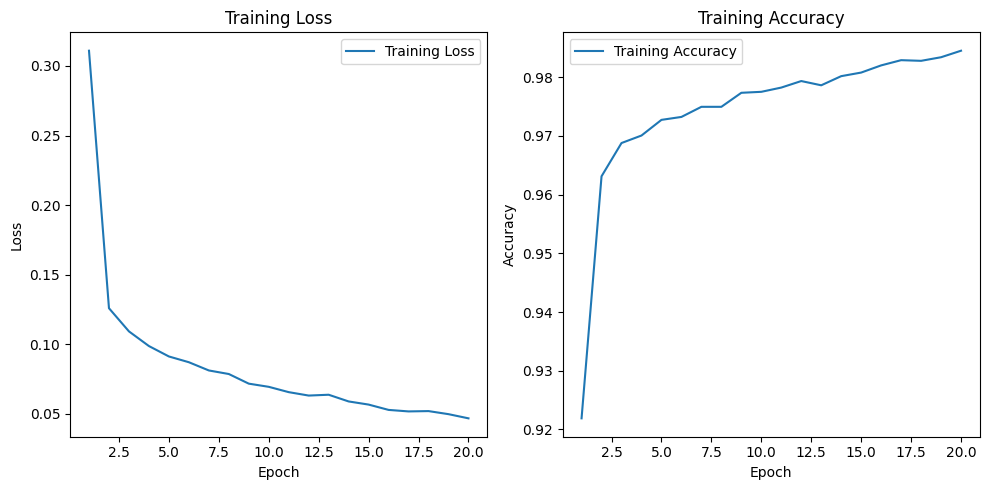

In [5]:
if MODE=="TRAIN" or MODE=="TRAIN1":
    # Train the first model
    model_1 = model_1()
    criterion_1 = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(model_1.parameters(), lr=lr)
    model_1 = train_model(model_1, train_loader_3, criterion_1, optimizer_1, 20, "saved_models/model1.png")

    # Test the first model
    test_model(model_1, test_loader_3)
    print(count_parameters(model_1))

    # Save the trained model
    model_path = os.path.join('saved_models', 'model_1_trained.pth')
    torch.save(model_1.state_dict(), model_path)
    print(f"Trained model-1 saved successfully at: {model_path}")

Epoch 0/25: 100%|██████████| 329/329 [00:00<00:00, 468.19batch/s]


Epoch 1/25, Average Loss: 0.6588, Accuracy: 77.24%


Epoch 1/25: 100%|██████████| 329/329 [00:00<00:00, 532.44batch/s]


Epoch 2/25, Average Loss: 0.4970, Accuracy: 82.05%


Epoch 2/25: 100%|██████████| 329/329 [00:00<00:00, 429.88batch/s]


Epoch 3/25, Average Loss: 0.4620, Accuracy: 83.11%


Epoch 3/25: 100%|██████████| 329/329 [00:00<00:00, 601.15batch/s]


Epoch 4/25, Average Loss: 0.4395, Accuracy: 83.86%


Epoch 4/25: 100%|██████████| 329/329 [00:00<00:00, 605.70batch/s]


Epoch 5/25, Average Loss: 0.4226, Accuracy: 84.53%


Epoch 5/25: 100%|██████████| 329/329 [00:00<00:00, 629.00batch/s]


Epoch 6/25, Average Loss: 0.4089, Accuracy: 84.94%


Epoch 6/25: 100%|██████████| 329/329 [00:00<00:00, 611.76batch/s]


Epoch 7/25, Average Loss: 0.3975, Accuracy: 85.30%


Epoch 7/25: 100%|██████████| 329/329 [00:01<00:00, 220.85batch/s]


Epoch 8/25, Average Loss: 0.3869, Accuracy: 85.64%


Epoch 8/25: 100%|██████████| 329/329 [00:01<00:00, 307.13batch/s]


Epoch 9/25, Average Loss: 0.3774, Accuracy: 85.97%


Epoch 9/25: 100%|██████████| 329/329 [00:00<00:00, 590.97batch/s]


Epoch 10/25, Average Loss: 0.3686, Accuracy: 86.34%


Epoch 10/25: 100%|██████████| 329/329 [00:00<00:00, 521.94batch/s]


Epoch 11/25, Average Loss: 0.3606, Accuracy: 86.56%


Epoch 11/25: 100%|██████████| 329/329 [00:00<00:00, 545.00batch/s]


Epoch 12/25, Average Loss: 0.3533, Accuracy: 86.86%


Epoch 12/25: 100%|██████████| 329/329 [00:00<00:00, 572.05batch/s]


Epoch 13/25, Average Loss: 0.3468, Accuracy: 87.10%


Epoch 13/25: 100%|██████████| 329/329 [00:00<00:00, 570.44batch/s]


Epoch 14/25, Average Loss: 0.3406, Accuracy: 87.30%


Epoch 14/25: 100%|██████████| 329/329 [00:00<00:00, 569.10batch/s]


Epoch 15/25, Average Loss: 0.3346, Accuracy: 87.46%


Epoch 15/25: 100%|██████████| 329/329 [00:00<00:00, 580.33batch/s]


Epoch 16/25, Average Loss: 0.3293, Accuracy: 87.70%


Epoch 16/25: 100%|██████████| 329/329 [00:00<00:00, 454.97batch/s]


Epoch 17/25, Average Loss: 0.3243, Accuracy: 87.95%


Epoch 17/25: 100%|██████████| 329/329 [00:00<00:00, 545.78batch/s]


Epoch 18/25, Average Loss: 0.3200, Accuracy: 88.08%


Epoch 18/25: 100%|██████████| 329/329 [00:00<00:00, 582.74batch/s]


Epoch 19/25, Average Loss: 0.3152, Accuracy: 88.25%


Epoch 19/25: 100%|██████████| 329/329 [00:00<00:00, 577.94batch/s]


Epoch 20/25, Average Loss: 0.3113, Accuracy: 88.44%


Epoch 20/25: 100%|██████████| 329/329 [00:00<00:00, 597.32batch/s]


Epoch 21/25, Average Loss: 0.3073, Accuracy: 88.56%


Epoch 21/25: 100%|██████████| 329/329 [00:00<00:00, 585.81batch/s]


Epoch 22/25, Average Loss: 0.3033, Accuracy: 88.69%


Epoch 22/25: 100%|██████████| 329/329 [00:00<00:00, 583.13batch/s]


Epoch 23/25, Average Loss: 0.2999, Accuracy: 88.84%


Epoch 23/25: 100%|██████████| 329/329 [00:00<00:00, 581.51batch/s]


Epoch 24/25, Average Loss: 0.2960, Accuracy: 88.97%


Epoch 24/25: 100%|██████████| 329/329 [00:00<00:00, 584.60batch/s]


Epoch 25/25, Average Loss: 0.2925, Accuracy: 89.12%
Test Accuracy: 85.13%
49111
Trained model-2 saved successfully at: saved_models/model_2_trained.pth


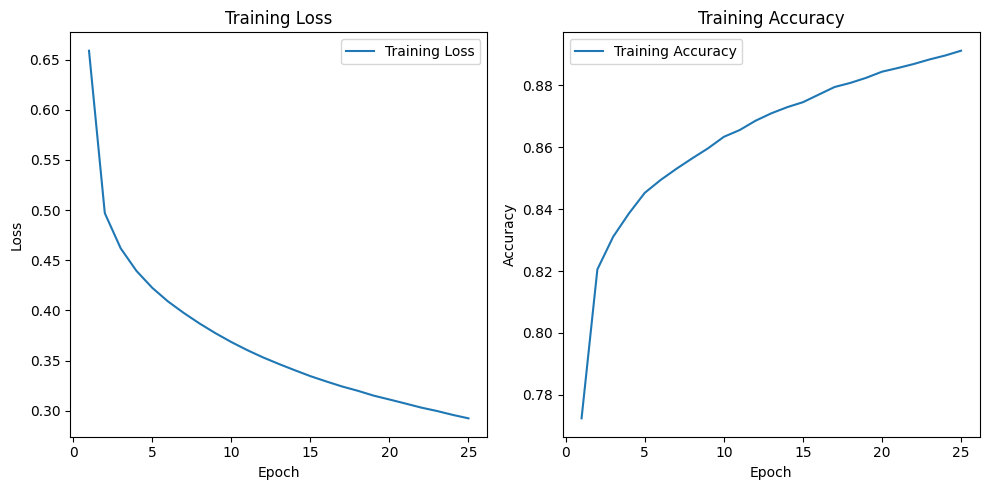

In [6]:
if MODE=="TRAIN" or MODE=="TRAIN2":
    # Train the second model
    model_2 = model_2()
    criterion_2 = nn.CrossEntropyLoss()
    optimizer_2 = optim.Adam(model_2.parameters(), lr=lr)
    model_2 = train_model(model_2, train_loader_7, criterion_2, optimizer_2, 25, "saved_models/model2.png")
    # Test the second model
    test_model(model_2, test_loader_7)
    print(count_parameters(model_2))

    # Save the trained model
    model_path = os.path.join('saved_models', 'model_2_trained.pth')
    torch.save(model_2.state_dict(), model_path)
    print(f"Trained model-2 saved successfully at: {model_path}")

Epoch 0/40: 100%|██████████| 329/329 [00:00<00:00, 383.88batch/s]


Epoch 1/40, Average Loss: 0.8996, Accuracy: 65.44%


Epoch 1/40: 100%|██████████| 329/329 [00:00<00:00, 413.76batch/s]


Epoch 2/40, Average Loss: 0.5715, Accuracy: 78.86%


Epoch 2/40: 100%|██████████| 329/329 [00:00<00:00, 483.73batch/s]


Epoch 3/40, Average Loss: 0.5004, Accuracy: 81.96%


Epoch 3/40: 100%|██████████| 329/329 [00:00<00:00, 397.41batch/s]


Epoch 4/40, Average Loss: 0.4625, Accuracy: 83.09%


Epoch 4/40: 100%|██████████| 329/329 [00:00<00:00, 425.24batch/s]


Epoch 5/40, Average Loss: 0.4379, Accuracy: 83.88%


Epoch 5/40: 100%|██████████| 329/329 [00:00<00:00, 497.44batch/s]


Epoch 6/40, Average Loss: 0.4183, Accuracy: 84.56%


Epoch 6/40: 100%|██████████| 329/329 [00:02<00:00, 158.35batch/s]


Epoch 7/40, Average Loss: 0.4026, Accuracy: 85.15%


Epoch 7/40: 100%|██████████| 329/329 [00:00<00:00, 483.83batch/s]


Epoch 8/40, Average Loss: 0.3895, Accuracy: 85.60%


Epoch 8/40: 100%|██████████| 329/329 [00:00<00:00, 477.20batch/s]


Epoch 9/40, Average Loss: 0.3787, Accuracy: 85.93%


Epoch 9/40: 100%|██████████| 329/329 [00:00<00:00, 482.04batch/s]


Epoch 10/40, Average Loss: 0.3682, Accuracy: 86.33%


Epoch 10/40: 100%|██████████| 329/329 [00:00<00:00, 485.36batch/s]


Epoch 11/40, Average Loss: 0.3597, Accuracy: 86.67%


Epoch 11/40: 100%|██████████| 329/329 [00:00<00:00, 411.12batch/s]


Epoch 12/40, Average Loss: 0.3521, Accuracy: 86.87%


Epoch 12/40: 100%|██████████| 329/329 [00:00<00:00, 406.77batch/s]


Epoch 13/40, Average Loss: 0.3448, Accuracy: 87.17%


Epoch 13/40: 100%|██████████| 329/329 [00:01<00:00, 313.49batch/s]


Epoch 14/40, Average Loss: 0.3377, Accuracy: 87.44%


Epoch 14/40: 100%|██████████| 329/329 [00:00<00:00, 345.94batch/s]


Epoch 15/40, Average Loss: 0.3315, Accuracy: 87.69%


Epoch 15/40: 100%|██████████| 329/329 [00:00<00:00, 400.83batch/s]


Epoch 16/40, Average Loss: 0.3258, Accuracy: 87.90%


Epoch 16/40: 100%|██████████| 329/329 [00:00<00:00, 444.40batch/s]


Epoch 17/40, Average Loss: 0.3204, Accuracy: 88.05%


Epoch 17/40: 100%|██████████| 329/329 [00:00<00:00, 472.08batch/s]


Epoch 18/40, Average Loss: 0.3148, Accuracy: 88.27%


Epoch 18/40: 100%|██████████| 329/329 [00:00<00:00, 478.41batch/s]


Epoch 19/40, Average Loss: 0.3096, Accuracy: 88.42%


Epoch 19/40: 100%|██████████| 329/329 [00:00<00:00, 480.13batch/s]


Epoch 20/40, Average Loss: 0.3042, Accuracy: 88.68%


Epoch 20/40: 100%|██████████| 329/329 [00:00<00:00, 399.05batch/s]


Epoch 21/40, Average Loss: 0.2993, Accuracy: 88.88%


Epoch 21/40: 100%|██████████| 329/329 [00:01<00:00, 319.77batch/s]


Epoch 22/40, Average Loss: 0.2944, Accuracy: 89.06%


Epoch 22/40: 100%|██████████| 329/329 [00:00<00:00, 439.58batch/s]


Epoch 23/40, Average Loss: 0.2894, Accuracy: 89.25%


Epoch 23/40: 100%|██████████| 329/329 [00:00<00:00, 466.80batch/s]


Epoch 24/40, Average Loss: 0.2847, Accuracy: 89.48%


Epoch 24/40: 100%|██████████| 329/329 [00:00<00:00, 456.73batch/s]


Epoch 25/40, Average Loss: 0.2803, Accuracy: 89.70%


Epoch 25/40: 100%|██████████| 329/329 [00:00<00:00, 379.89batch/s]


Epoch 26/40, Average Loss: 0.2759, Accuracy: 89.80%


Epoch 26/40: 100%|██████████| 329/329 [00:00<00:00, 489.72batch/s]


Epoch 27/40, Average Loss: 0.2718, Accuracy: 89.98%


Epoch 27/40: 100%|██████████| 329/329 [00:00<00:00, 398.88batch/s]


Epoch 28/40, Average Loss: 0.2674, Accuracy: 90.14%


Epoch 28/40: 100%|██████████| 329/329 [00:00<00:00, 504.15batch/s]


Epoch 29/40, Average Loss: 0.2639, Accuracy: 90.28%


Epoch 29/40: 100%|██████████| 329/329 [00:00<00:00, 495.30batch/s]


Epoch 30/40, Average Loss: 0.2593, Accuracy: 90.45%


Epoch 30/40: 100%|██████████| 329/329 [00:00<00:00, 511.69batch/s]


Epoch 31/40, Average Loss: 0.2551, Accuracy: 90.59%


Epoch 31/40: 100%|██████████| 329/329 [00:00<00:00, 547.83batch/s]


Epoch 32/40, Average Loss: 0.2519, Accuracy: 90.72%


Epoch 32/40: 100%|██████████| 329/329 [00:00<00:00, 552.89batch/s]


Epoch 33/40, Average Loss: 0.2481, Accuracy: 90.84%


Epoch 33/40: 100%|██████████| 329/329 [00:00<00:00, 532.72batch/s]


Epoch 34/40, Average Loss: 0.2447, Accuracy: 91.04%


Epoch 34/40: 100%|██████████| 329/329 [00:00<00:00, 520.13batch/s]


Epoch 35/40, Average Loss: 0.2417, Accuracy: 91.16%


Epoch 35/40: 100%|██████████| 329/329 [00:00<00:00, 451.72batch/s]


Epoch 36/40, Average Loss: 0.2380, Accuracy: 91.32%


Epoch 36/40: 100%|██████████| 329/329 [00:00<00:00, 546.95batch/s]


Epoch 37/40, Average Loss: 0.2347, Accuracy: 91.43%


Epoch 37/40: 100%|██████████| 329/329 [00:00<00:00, 474.11batch/s]


Epoch 38/40, Average Loss: 0.2311, Accuracy: 91.55%


Epoch 38/40: 100%|██████████| 329/329 [00:00<00:00, 495.18batch/s]


Epoch 39/40, Average Loss: 0.2281, Accuracy: 91.64%


Epoch 39/40: 100%|██████████| 329/329 [00:00<00:00, 507.58batch/s]


Epoch 40/40, Average Loss: 0.2243, Accuracy: 91.79%
Test Accuracy: 85.57%
49319
Trained model-3 saved successfully at: saved_models/model_3_trained.pth


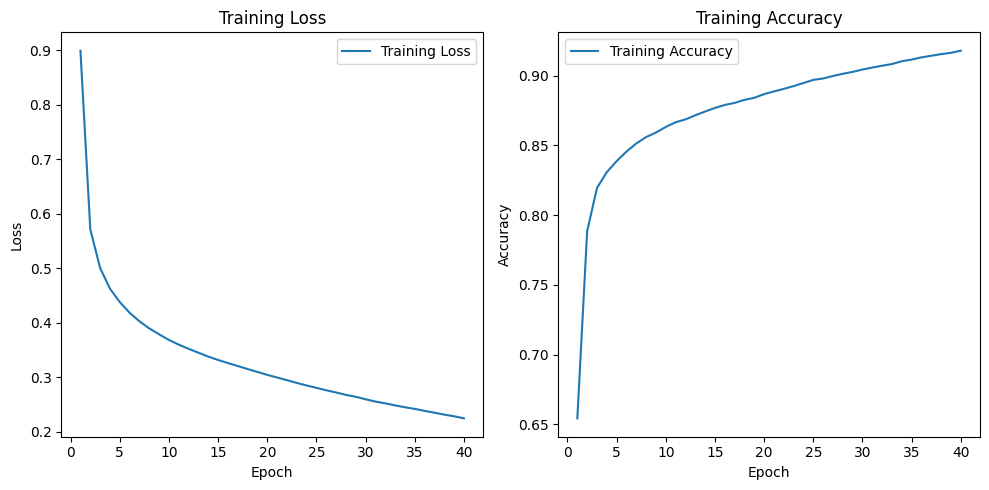

In [7]:
if MODE=="TRAIN" or MODE=="TRAIN3":
    # Train the third model
    model_3 = model_3()
    criterion_3 = nn.CrossEntropyLoss()
    optimizer_3 = optim.Adam(model_3.parameters(), lr=lr)
    model_3 = train_model(model_3, train_loader_7, criterion_3, optimizer_3, 40, "saved_models/model3.png")

    # Test the third model
    test_model(model_3, test_loader_7)
    print(count_parameters(model_3))

    # Save the trained model
    model_path = os.path.join('saved_models', 'model_3_trained.pth')
    torch.save(model_3.state_dict(), model_path)
    print(f"Trained model-3 saved successfully at: {model_path}")

Epoch 0/40: 100%|██████████| 329/329 [00:11<00:00, 29.35batch/s]


Epoch 1/40, Average Loss: 0.7748, Accuracy: 70.16%


Epoch 1/40: 100%|██████████| 329/329 [00:08<00:00, 40.50batch/s]


Epoch 2/40, Average Loss: 0.5052, Accuracy: 80.79%


Epoch 2/40: 100%|██████████| 329/329 [00:08<00:00, 37.17batch/s]


Epoch 3/40, Average Loss: 0.4422, Accuracy: 83.26%


Epoch 3/40: 100%|██████████| 329/329 [00:09<00:00, 36.03batch/s]


Epoch 4/40, Average Loss: 0.4090, Accuracy: 84.56%


Epoch 4/40: 100%|██████████| 329/329 [00:09<00:00, 34.25batch/s]


Epoch 5/40, Average Loss: 0.3860, Accuracy: 85.49%


Epoch 5/40: 100%|██████████| 329/329 [00:10<00:00, 32.23batch/s]


Epoch 6/40, Average Loss: 0.3681, Accuracy: 86.17%


Epoch 6/40: 100%|██████████| 329/329 [00:09<00:00, 35.91batch/s]


Epoch 7/40, Average Loss: 0.3571, Accuracy: 86.66%


Epoch 7/40: 100%|██████████| 329/329 [00:10<00:00, 31.67batch/s]


Epoch 8/40, Average Loss: 0.3443, Accuracy: 87.15%


Epoch 8/40: 100%|██████████| 329/329 [00:08<00:00, 38.89batch/s]


Epoch 9/40, Average Loss: 0.3311, Accuracy: 87.70%


Epoch 9/40: 100%|██████████| 329/329 [00:08<00:00, 40.29batch/s]


Epoch 10/40, Average Loss: 0.3219, Accuracy: 87.85%


Epoch 10/40: 100%|██████████| 329/329 [00:08<00:00, 38.96batch/s]


Epoch 11/40, Average Loss: 0.3162, Accuracy: 88.17%


Epoch 11/40: 100%|██████████| 329/329 [00:08<00:00, 40.15batch/s]


Epoch 12/40, Average Loss: 0.3056, Accuracy: 88.60%


Epoch 12/40: 100%|██████████| 329/329 [00:08<00:00, 37.29batch/s]


Epoch 13/40, Average Loss: 0.3034, Accuracy: 88.65%


Epoch 13/40: 100%|██████████| 329/329 [00:08<00:00, 39.67batch/s]


Epoch 14/40, Average Loss: 0.2951, Accuracy: 89.05%


Epoch 14/40: 100%|██████████| 329/329 [00:08<00:00, 37.79batch/s]


Epoch 15/40, Average Loss: 0.2903, Accuracy: 89.10%


Epoch 15/40: 100%|██████████| 329/329 [00:08<00:00, 39.04batch/s]


Epoch 16/40, Average Loss: 0.2810, Accuracy: 89.47%


Epoch 16/40: 100%|██████████| 329/329 [00:08<00:00, 38.79batch/s]


Epoch 17/40, Average Loss: 0.2778, Accuracy: 89.70%


Epoch 17/40: 100%|██████████| 329/329 [00:08<00:00, 38.82batch/s]


Epoch 18/40, Average Loss: 0.2735, Accuracy: 89.73%


Epoch 18/40: 100%|██████████| 329/329 [00:08<00:00, 39.11batch/s]


Epoch 19/40, Average Loss: 0.2690, Accuracy: 89.82%


Epoch 19/40: 100%|██████████| 329/329 [00:08<00:00, 38.33batch/s]


Epoch 20/40, Average Loss: 0.2633, Accuracy: 90.01%


Epoch 20/40: 100%|██████████| 329/329 [00:08<00:00, 37.90batch/s]


Epoch 21/40, Average Loss: 0.2614, Accuracy: 90.17%


Epoch 21/40: 100%|██████████| 329/329 [00:08<00:00, 37.99batch/s]


Epoch 22/40, Average Loss: 0.2586, Accuracy: 90.20%


Epoch 22/40: 100%|██████████| 329/329 [00:08<00:00, 39.15batch/s]


Epoch 23/40, Average Loss: 0.2535, Accuracy: 90.39%


Epoch 23/40: 100%|██████████| 329/329 [00:08<00:00, 38.49batch/s]


Epoch 24/40, Average Loss: 0.2520, Accuracy: 90.59%


Epoch 24/40: 100%|██████████| 329/329 [00:08<00:00, 36.99batch/s]


Epoch 25/40, Average Loss: 0.2453, Accuracy: 90.88%


Epoch 25/40: 100%|██████████| 329/329 [00:08<00:00, 39.27batch/s]


Epoch 26/40, Average Loss: 0.2428, Accuracy: 90.80%


Epoch 26/40: 100%|██████████| 329/329 [00:08<00:00, 38.29batch/s]


Epoch 27/40, Average Loss: 0.2398, Accuracy: 91.07%


Epoch 27/40: 100%|██████████| 329/329 [00:08<00:00, 38.67batch/s]


Epoch 28/40, Average Loss: 0.2396, Accuracy: 90.89%


Epoch 28/40: 100%|██████████| 329/329 [00:09<00:00, 35.64batch/s]


Epoch 29/40, Average Loss: 0.2348, Accuracy: 91.35%


Epoch 29/40: 100%|██████████| 329/329 [00:09<00:00, 36.55batch/s]


Epoch 30/40, Average Loss: 0.2331, Accuracy: 91.29%


Epoch 30/40: 100%|██████████| 329/329 [00:08<00:00, 38.16batch/s]


Epoch 31/40, Average Loss: 0.2337, Accuracy: 91.25%


Epoch 31/40: 100%|██████████| 329/329 [00:08<00:00, 37.58batch/s]


Epoch 32/40, Average Loss: 0.2289, Accuracy: 91.46%


Epoch 32/40: 100%|██████████| 329/329 [00:08<00:00, 38.59batch/s]


Epoch 33/40, Average Loss: 0.2249, Accuracy: 91.63%


Epoch 33/40: 100%|██████████| 329/329 [00:08<00:00, 37.83batch/s]


Epoch 34/40, Average Loss: 0.2234, Accuracy: 91.54%


Epoch 34/40: 100%|██████████| 329/329 [00:08<00:00, 37.88batch/s]


Epoch 35/40, Average Loss: 0.2197, Accuracy: 91.82%


Epoch 35/40: 100%|██████████| 329/329 [00:08<00:00, 38.59batch/s]


Epoch 36/40, Average Loss: 0.2189, Accuracy: 91.75%


Epoch 36/40: 100%|██████████| 329/329 [00:08<00:00, 37.90batch/s]


Epoch 37/40, Average Loss: 0.2191, Accuracy: 91.79%


Epoch 37/40: 100%|██████████| 329/329 [00:08<00:00, 38.30batch/s]


Epoch 38/40, Average Loss: 0.2168, Accuracy: 91.82%


Epoch 38/40: 100%|██████████| 329/329 [00:08<00:00, 37.59batch/s]


Epoch 39/40, Average Loss: 0.2131, Accuracy: 91.94%


Epoch 39/40: 100%|██████████| 329/329 [00:08<00:00, 37.59batch/s]


Epoch 40/40, Average Loss: 0.2139, Accuracy: 91.96%
Test Accuracy: 89.60%
45607
Trained model-4 saved successfully at: saved_models/model_4_trained.pth


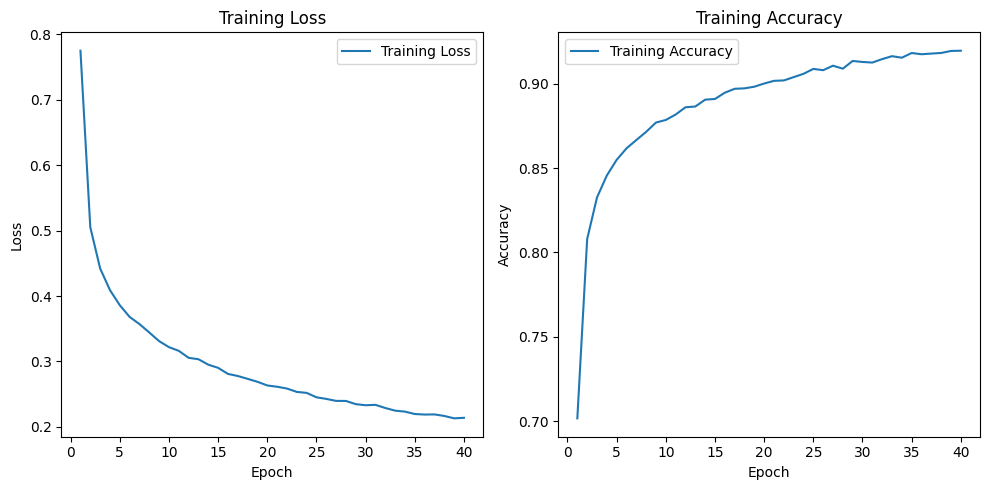

In [8]:
if MODE=="TRAIN" or MODE=="TRAIN4":
    # Train the forth model
    model_4 = model_4()
    criterion_4 = nn.CrossEntropyLoss()
    optimizer_4 = optim.Adam(model_4.parameters(), lr=lr)
    model_4 = train_model(model_4, train_loader_7, criterion_4, optimizer_4, 40, "saved_models/model4.png")
    # Test the forth model
    test_model(model_4, test_loader_7)
    print(count_parameters(model_4))

    # Save the trained model
    model_path = os.path.join('saved_models', 'model_4_trained.pth')
    torch.save(model_4.state_dict(), model_path)
    print(f"Trained model-4 saved successfully at: {model_path}")